# Getting the data

In [1]:
import requests
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Data from: https://en.wikipedia.org/wiki/Casualties_of_the_Syrian_Civil_War#Death_tolls_by_time_periods
casualties_df = pd.DataFrame({
    'year': ['2011/2012', '2013', '2014', '2015', '2016', '2017'],
    'pro-gov': [22051, 30239, 25160, 17686, 14192, 976],
    'anti-gov': [10271, 18812, 32726, 24010, 21467, 2446],
    'civilians': [23830, 22436, 17790, 13249, 13617, 1414]
}, columns=['year', 'pro-gov', 'anti-gov', 'civilians'])
casualties_df['total'] = casualties_df['pro-gov'] + casualties_df['anti-gov'] + casualties_df['civilians']
casualties_df = casualties_df.set_index('year')
casualties_df

,pro-gov,anti-gov,civilians,total
year,,,,
2011/2012,22051,10271,23830,56152
2013,30239,18812,22436,71487
2014,25160,32726,17790,75676
2015,17686,24010,13249,54945
2016,14192,21467,13617,49276
2017,976,2446,1414,4836


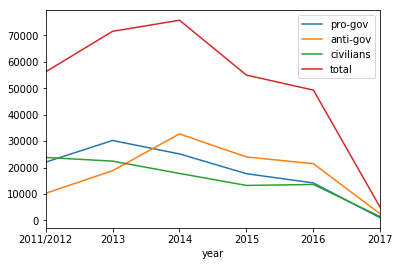

In [3]:
casualties_df.plot()

Refugees numbers extracted from http://popstats.unhcr.org/en/time_series

Selecting: 

* Years 2011 through 2015
* All Country / territory of asylum/residence
* Only Syrian Arab Rep. as Origin
* All Population type


In [4]:
refugees_df = pd.read_csv('unhcr_popstats_export_time_series_2017_03_12_145925.csv', delimiter=',', skiprows=3)
# As the comment on http://popstats.unhcr.org/en/time_series says :
#"In the 2014 data, figures between 1 and 4 have been replaced with an asterisk (*). 
# These represent situations where the figures are being kept confidential to protect the anonymity of individuals."
# So replacing an asterisk with 1
refugees_df['Value'] = refugees_df['Value'].replace('*', 1) 
refugees_df['Value'] = refugees_df['Value'].astype(int)

# I only want to look as the numbers in general so losing the Country column
# and I only selected Syria as an origin country so I don't need that columns either
refugees_df = refugees_df[['Year', 'Population type', 'Value']]

# Grouping
refugees_df = refugees_df.groupby(['Year', 'Population type']).sum()

In [5]:
refugees_df = refugees_df.reset_index(level=0) # Year index to column
refugees_df = refugees_df.reset_index(level=0) # Population type index to column
refugees_df['Year'] = refugees_df['Year'].astype(str)

In [6]:
refugees_df = refugees_df.pivot(index='Year', columns='Population type', values='Value')
refugees_df

Population type,Asylum-seekers,Internally displaced persons,Others of concern,Refugees (incl. refugee-like situations),Returned IDPs,Returnees,Stateless
Year,,,,,,,
2011,14456.0,NaN,14110.0,19931.0,NaN,NaN,231000.0
2012,26023.0,2016500.0,6900.0,729022.0,NaN,68573.0,221000.0
2013,41037.0,6520800.0,9400.0,2468332.0,NaN,140761.0,160000.0
2014,79649.0,7632500.0,1993.0,3883569.0,NaN,NaN,160000.0
2015,245815.0,6563462.0,8247.0,4872564.0,0.0,189.0,0.0


In [7]:
# Droping Returned IDPs since it's empty
refugees_df = refugees_df.drop('Returned IDPs', axis=1)
refugees_df

Population type,Asylum-seekers,Internally displaced persons,Others of concern,Refugees (incl. refugee-like situations),Returnees,Stateless
Year,,,,,,
2011,14456.0,NaN,14110.0,19931.0,NaN,231000.0
2012,26023.0,2016500.0,6900.0,729022.0,68573.0,221000.0
2013,41037.0,6520800.0,9400.0,2468332.0,140761.0,160000.0
2014,79649.0,7632500.0,1993.0,3883569.0,NaN,160000.0
2015,245815.0,6563462.0,8247.0,4872564.0,189.0,0.0


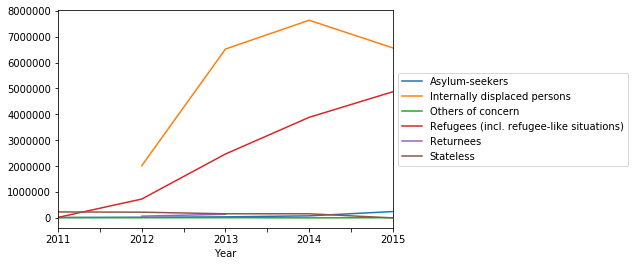

In [8]:
refugees_df.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

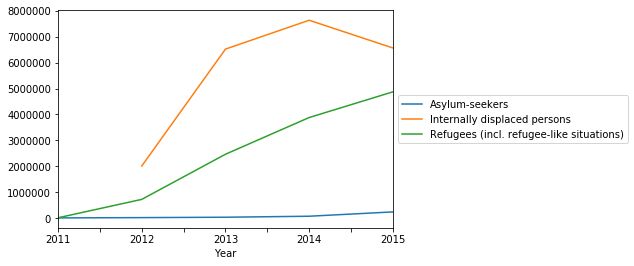

In [9]:
# Focusing on asylum seekers, Internally displaced, and Refugees
refugees_df[['Asylum-seekers', 'Internally displaced persons', 'Refugees (incl. refugee-like situations)']].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [10]:
casualties_df.sum()

pro-gov      110304
anti-gov     109732
civilians     92336
total        312372
dtype: int64